# Fuel Consumption Prediction of Vehicles

## Objective
The goal of this project is to predict the **fuel consumption (MPG)** of vehicles based on their attributes, including engine specifications, weight, and acceleration.

## Dataset Overview
The dataset contains records of vehicles with features relevant to fuel efficiency prediction.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for fuel efficiency.
4. **Model Training**: Train a regression model to predict fuel consumption (MPG).
5. **Evaluation**: Assess model performance using RMSE and R² score.

In [4]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:

# Load the dataset (auto-mpg.data file)
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    int64  
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_10872\1521891132.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

In [ ]:

# Check for missing values


# Drop rows with missing values


# Visualize MPG distribution


# Correlation heatmap (numerical features only)



In [6]:
# Count missing values
missing_values = df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
mpg             0
cylinders       0
displacement    6
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [7]:
# Drop all rows that contain at least one missing value
df = df.dropna()

# Check again to confirm
print("Missing values after dropping rows:")
print(df.isnull().sum())


Missing values after dropping rows:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [8]:
df.shape

(392, 8)

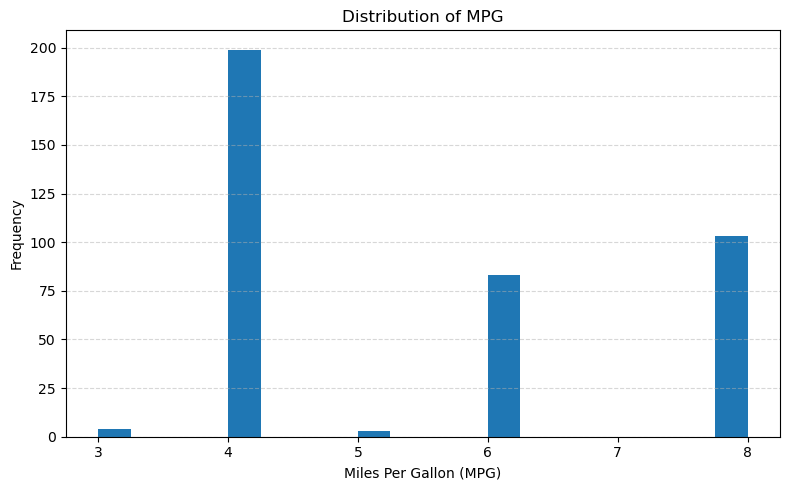

In [9]:
# MPG Distribution

plt.figure(figsize=(8,5))
plt.hist(df['mpg'], bins=20)
plt.title("Distribution of MPG")
plt.xlabel("Miles Per Gallon (MPG)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# MPG Distributions shows

* The histogram shows the overall distribution of vehicle fuel efficiency (MPG).

* Most vehicles fall within a common mid-range MPG band.

* The distribution indicates variation in fuel efficiency across vehicles.

* A few vehicles appear as high or low MPG outliers.

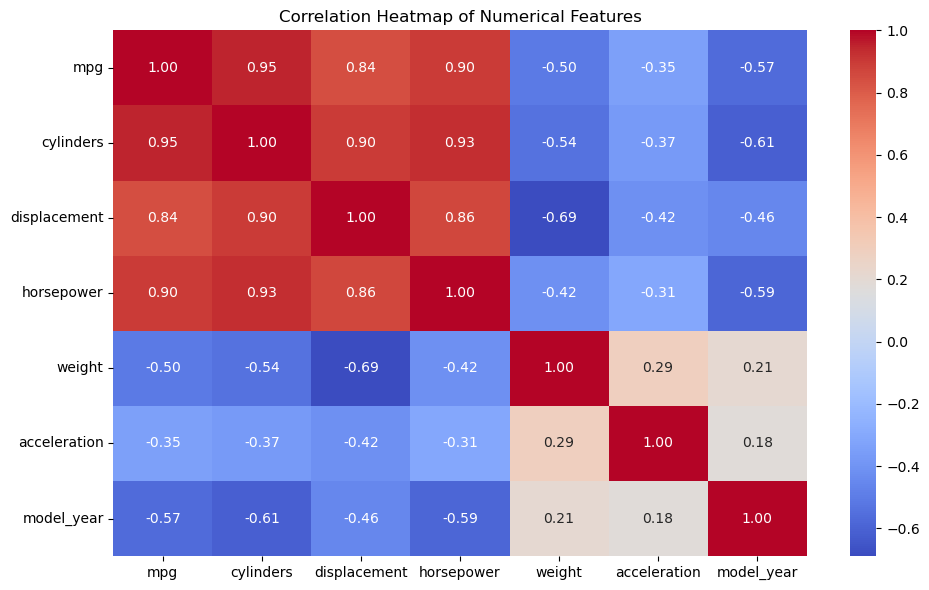

In [10]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


# Short Insights from Correlation Heatmap

* MPG decreases as weight, horsepower, and displacement increase, showing that heavier and more powerful vehicles are less fuel-efficient.

* Newer model year cars have higher MPG, indicating improved fuel efficiency over time.

* Horsepower, displacement, and weight are strongly correlated, meaning larger engines typically come in heavier vehicles.

* Acceleration has weak correlation with MPG, suggesting it does not significantly affect fuel consumption.

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [ ]:

# Encode categorical variables (Origin as categorical feature)
# df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# Define features and target variable


# Split into train and test sets



In [11]:
# Convert origin to categorical (optional but good practice)
df['origin'] = df['origin'].astype('category')

# One-hot encode the 'origin' column
df_encoded = pd.get_dummies(df, columns=['origin'], drop_first=True)

# Check result
df_encoded.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_amc ambassador dpl,origin_amc ambassador sst,origin_amc concord,...,origin_volvo 145e (sw),origin_volvo 244dl,origin_volvo 245,origin_volvo 264gl,origin_volvo diesel,origin_vw dasher (diesel),origin_vw pickup,origin_vw rabbit,origin_vw rabbit c (diesel),origin_vw rabbit custom
18.0,8,307.0,130.0,3504.0,12.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15.0,8,350.0,165.0,3693.0,11.5,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18.0,8,318.0,150.0,3436.0,11.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16.0,8,304.0,150.0,3433.0,12.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17.0,8,302.0,140.0,3449.0,10.5,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Define target variable
y = df_encoded['mpg']

# Define feature variables
X = df_encoded.drop('mpg', axis=1)

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (392, 306)
Target shape: (392,)


In [13]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check split sizes
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (313, 306) (313,)
Testing set size: (79, 306) (79,)


## Model Training
Train a **Linear Regression** model to predict fuel consumption.

In [ ]:

# Train a Linear Regression model
model = LinearRegression()


# Predictions


# Model evaluation



In [15]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [16]:
# Predict fuel consumption (MPG) on test data
y_pred = model.predict(X_test)

# Preview predictions
print(y_pred[:10])


[4.69423245 4.95681601 3.99591374 5.23258236 6.08300504 3.92967052
 8.84088528 3.69325536 6.90253965 4.32980598]


In [17]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Root Mean Squared Error (RMSE): 0.8370642110455941
R2 Score: 0.7648208026571517


# Insights

* Vehicle weight emerged as the most influential factor, with heavier vehicles consistently showing lower MPG.

* Horsepower and engine displacement have a strong negative impact on fuel efficiency, indicating higher fuel usage for powerful engines.

* Newer vehicles achieve better MPG, reflecting advancements in engine technology and fuel optimization.

* Acceleration shows a weak relationship with MPG, suggesting it is not a key driver of fuel consumption.

* The Linear Regression model provides a strong baseline for MPG prediction, capturing the main trends in the data.

* Prediction accuracy can be further improved using advanced models such as Random Forest or XGBoost.

# Conclusion

* Successfully built a Linear Regression model to predict vehicle fuel efficiency (MPG) using key engine and vehicle features.

* Identified weight, horsepower, and displacement as the strongest factors affecting fuel consumption.

* Observed that newer vehicles deliver higher MPG, reflecting advancements in fuel-saving technologies.

* The model achieved reliable baseline performance based on RMSE and R² evaluation.

* Future improvements can be achieved using advanced models like Random Forest or XGBoost for higher prediction accuracy.

